In [1]:
import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import random
import torch

In [2]:
seed = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(seed)

In [3]:
# load data
path = '/kaggle/input/calabi-yau-cicy-4-folds/'
conf = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf.npy')
hodge = np.load(os.path.join(path, 'hodge.npy'))
direct = np.load(os.path.join(path, 'direct.npy'))
conf.shape, hodge.shape, direct.shape

((921497, 16, 20), (921497, 4), (921497,))

In [4]:
conf = conf[~direct]
hodge = hodge[~direct]

In [9]:
#FULL DATASET AFTER GETTING RID OF DIRECT MANIFOLDS
X = conf
y = hodge
X.shape, y.shape

((905684, 16, 20), (905684, 4))

In [5]:
h11 = hodge[:,0]
h21 = hodge[:,1]
h22 = hodge[:,3]
h31 = hodge[:,2]
h11max = np.max(hodge[:,0])
h11min = np.min(hodge[:,0])
print(f'Max h11: {h11max}, Min h11: {h11min} ')
h21max = np.max(hodge[:,1])
h21min = np.min(hodge[:,1])
print(f'Max h21: {h21max}, Min h21: {h21min} ')
h31max = np.max(hodge[:,2])
h31min = np.min(hodge[:,2])
print(f'Max h31: {h31max}, Min h31: {h31min} ')
h22max = np.max(hodge[:,3])
h22min = np.min(hodge[:,3])
print(f'Max h22: {h22max}, Min h22: {h22min} ')

Max h11: 24, Min h11: 1 
Max h21: 33, Min h21: 0 
Max h31: 426, Min h31: 20 
Max h22: 1752, Min h22: 204 


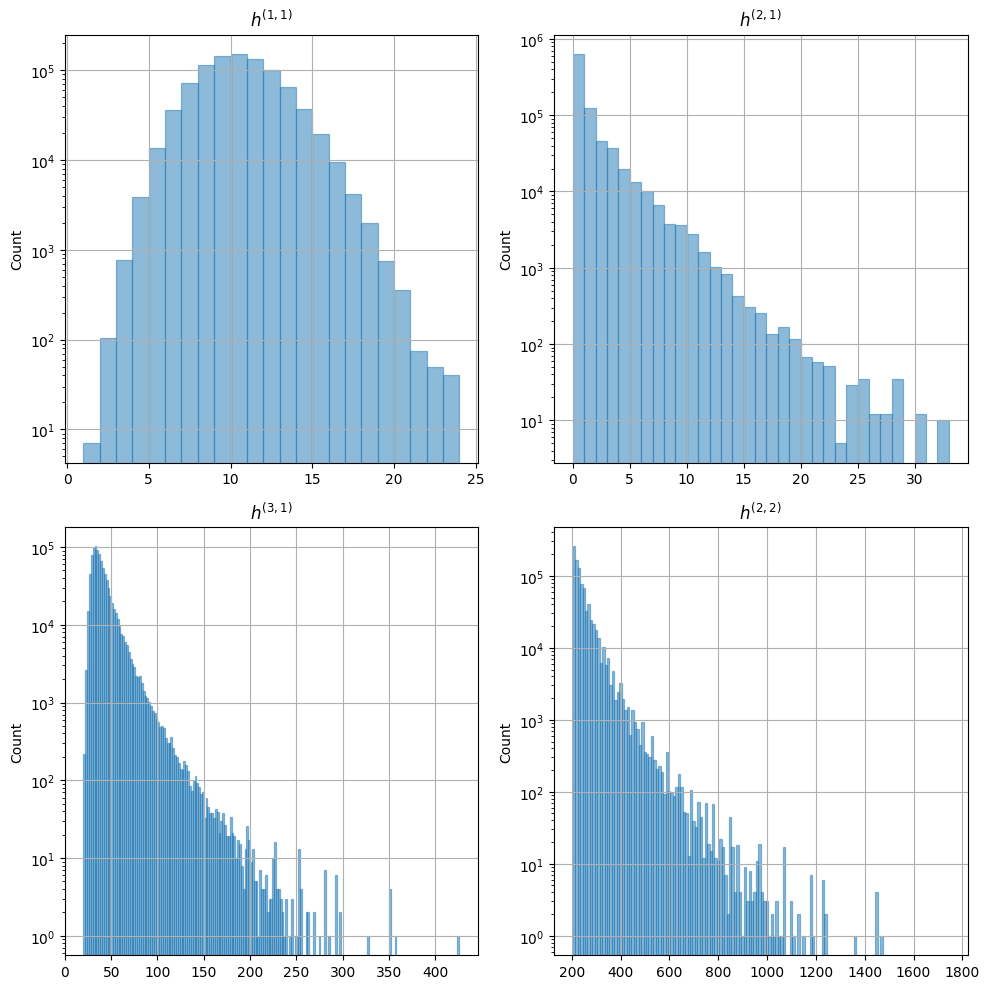

In [6]:
#REPRODUCING THE PLOT IN THE INCEPTION PAPER
style = {'edgecolor': 'C0', 'linewidth': 0.9}
fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)
ax[0,0].hist(hodge[:,0], bins=range(h11min, h11max+1), alpha=0.5, **style)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(hodge[:,1], bins=range(h21min, h21max+1), alpha=0.5, **style)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(hodge[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, **style)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(hodge[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, **style)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.savefig('All_Hodge_dist')

# Load 72% data split

In [7]:
#TRAIN SET
X_train = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xtrain.npy')
y_train = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_ytrain.npy')

#VALIDATION SET
X_valid = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xvalid.npy')
y_valid = np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_yvalid.npy')

# TEST SET
X_test = np.load('/kaggle/input/calabi-yau-cicy-4-folds/conf_Xtest.npy')
y_test= np.load('/kaggle/input/calabi-yau-cicy-4-folds/hodge_ytest.npy')

X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((652092, 16, 20),
 (72455, 16, 20),
 (181137, 16, 20),
 (652092, 4),
 (72455, 4),
 (181137, 4))

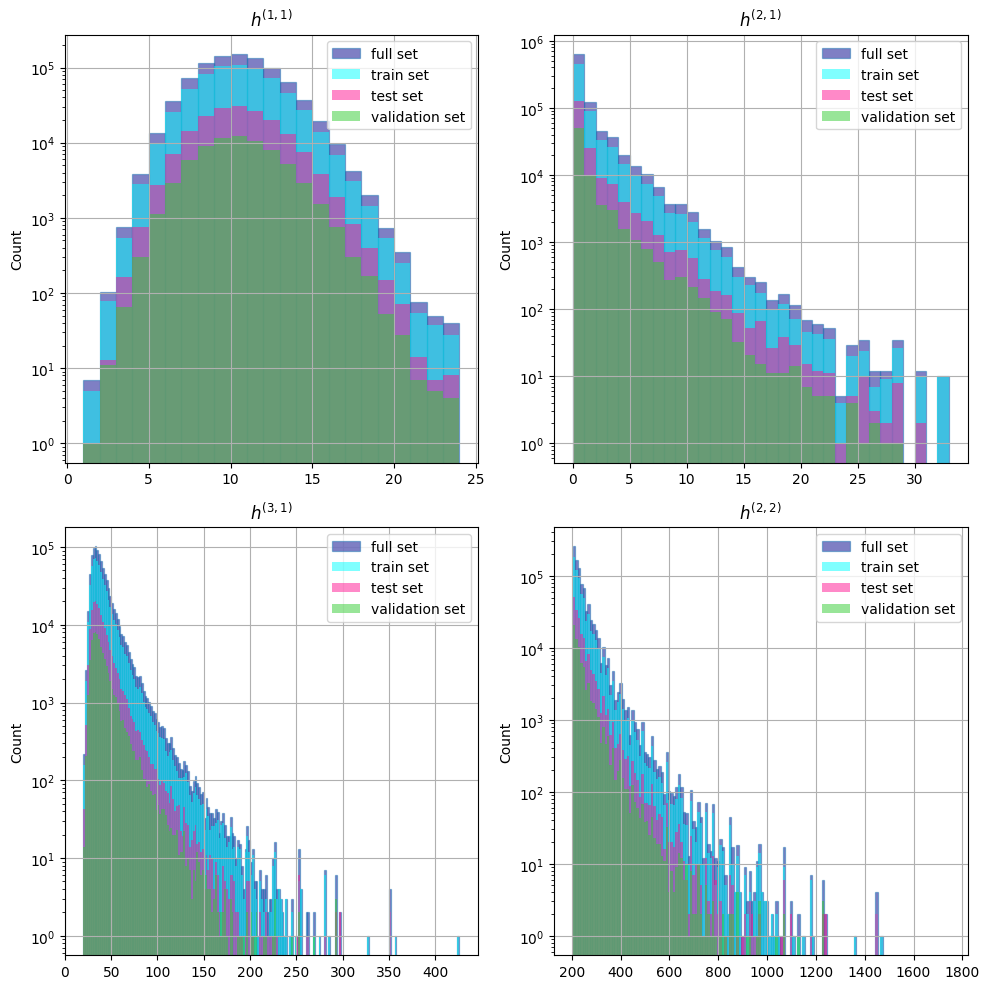

In [10]:
style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style3 = {'facecolor': 'limegreen'}
style2 = {'facecolor': 'deeppink'}
style1 = {'facecolor': 'cyan'}


fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(y[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
ax[0,0].hist(y_train[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
ax[0,0].hist(y_test[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'test set', **style2)
ax[0,0].hist(y_valid[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'validation set', **style3)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(y[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
ax[0,1].hist(y_train[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
ax[0,1].hist(y_test[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='test set',**style2)
ax[0,1].hist(y_valid[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style3)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(y[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
ax[1,0].hist(y_train[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
ax[1,0].hist(y_test[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='test set',**style2)
ax[1,0].hist(y_valid[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style3)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(y[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
ax[1,1].hist(y_train[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
ax[1,1].hist(y_test[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'test set',**style2)
ax[1,1].hist(y_valid[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style3)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.savefig('Hodge_numbers_distributions')


# Create 80% data split

In [19]:
# 8% of the data set corresponds to 40% of the test set
y_valid.shape[0]/y_test.shape[0], y_valid.shape[0]

(0.40000110413664797, 72455)

In [20]:
from sklearn.model_selection import train_test_split

X_test_new,  X_train_new, y_test_new, y_train_new = train_test_split(X_test, y_test, test_size = 0.4, random_state = 101, shuffle = True)
print(f'X_train_new shape: {X_train_new.shape}, \n y_train_new shape:{y_train_new.shape},\
                 \n X_test shape: {X_test_new.shape}, \n y_test_new shape:{y_test_new.shape}')

X_train_new shape: (72455, 16, 20), 
 y_train_new shape:(72455, 4),                 
 X_test shape: (108682, 16, 20), 
 y_test_new shape:(108682, 4)


In [21]:
#Merge the (X_train_new, y_train_new) portion into the total training set
X_train_tot  = np.concatenate((X_train, X_train_new), axis = 0)
y_train_tot =  np.concatenate((y_train, y_train_new), axis = 0)
X_train_tot.shape, y_train_tot.shape

((724547, 16, 20), (724547, 4))

In [35]:
X_train_tot.shape[0], X.shape[0], X_test_new.shape[0], np.round(X_train_tot.shape[0]/X.shape[0],2), np.round(X_test_new.shape[0]/X.shape[0],2)

(724547, 905684, 108682, 0.8, 0.12)

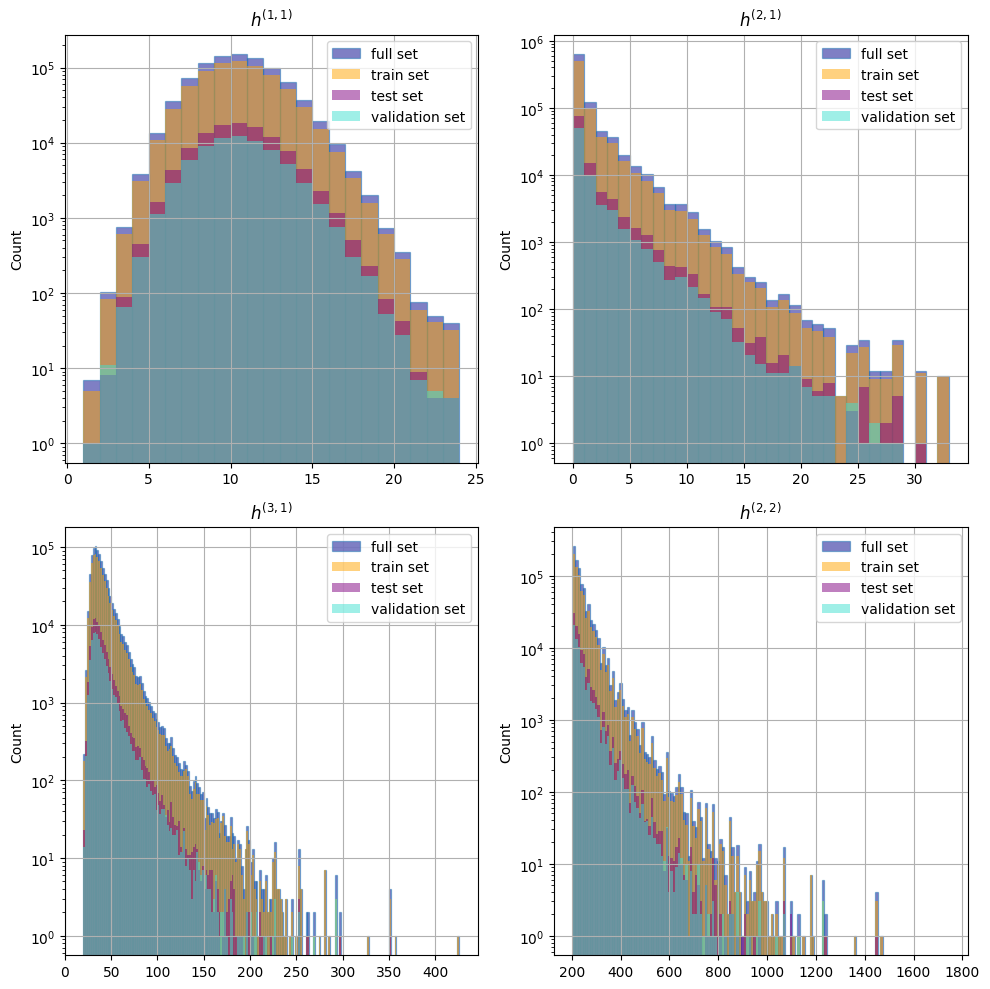

In [22]:
style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style3 = {'facecolor': 'turquoise'}
style2 = {'facecolor': 'purple'}
style1 = {'facecolor': 'orange'}


fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(y[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'full set', **style)
ax[0,0].hist(y_train_tot[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train set', **style1)
ax[0,0].hist(y_test_new[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'test set', **style2)
ax[0,0].hist(y_valid[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'validation set', **style3)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')

ax[0,1].hist(y[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'full set', **style)
ax[0,1].hist(y_train_tot[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train set',**style1)
ax[0,1].hist(y_test_new[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='test set',**style2)
ax[0,1].hist(y_valid[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='validation set',**style3)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(y[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='full set', **style)
ax[1,0].hist(y_train_tot[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train set',**style1)
ax[1,0].hist(y_test_new[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='test set',**style2)
ax[1,0].hist(y_valid[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='validation set',**style3)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(y[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'full set', **style)
ax[1,1].hist(y_train_tot[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train set',**style1)
ax[1,1].hist(y_test_new[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'test set',**style2)
ax[1,1].hist(y_valid[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'validation set', **style3)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.savefig('Hodge_numbers_distributions_80pc_split')


# New data split vs Old data split

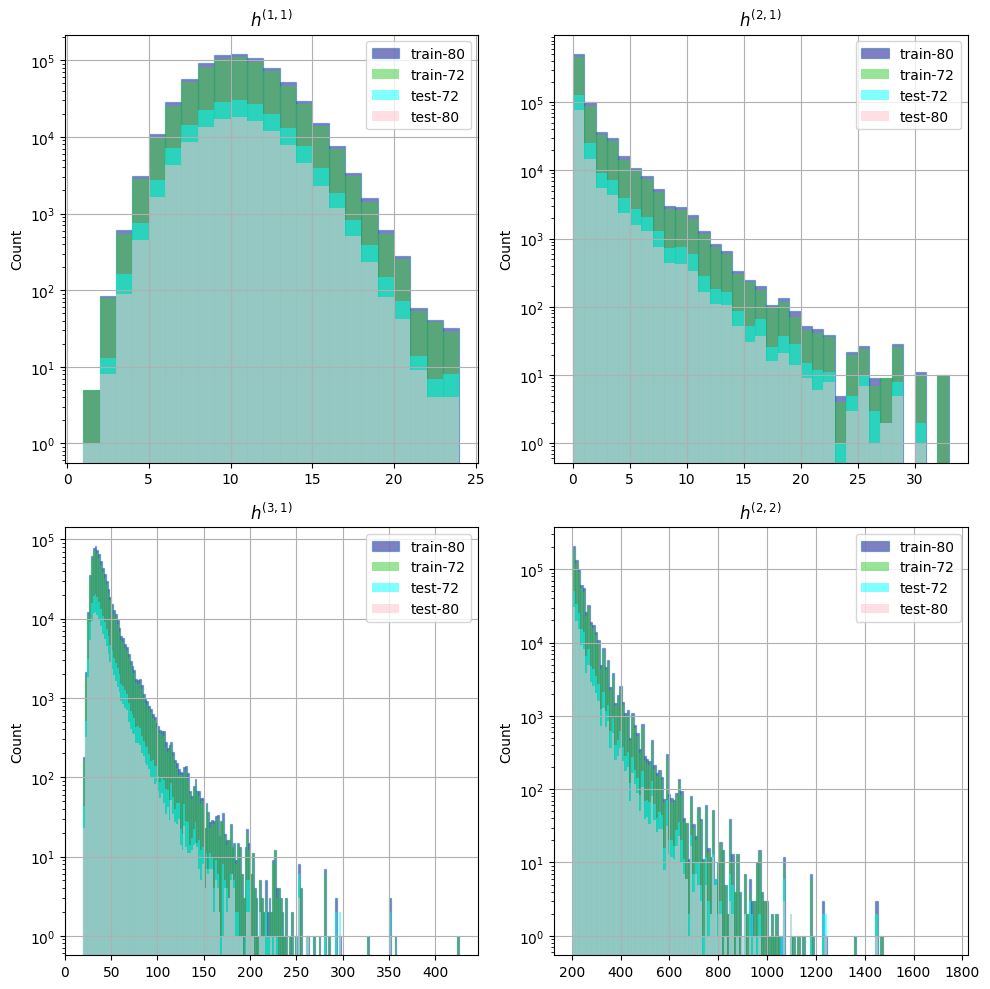

In [31]:
style = {'facecolor': 'darkblue', 'edgecolor': 'C0', 'linewidth': 0.9}
style1 = {'facecolor': 'limegreen'}
style2 = {'facecolor': 'cyan'}
style3 = {'facecolor': 'pink'}


fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)

ax[0,0].hist(y_train_tot[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train-80', **style)
ax[0,0].hist(y_train[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'train-72', **style1)
ax[0,0].hist(y_test[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'test-72', **style2)
ax[0,0].hist(y_test_new[:,0], bins=range(h11min, h11max+1), alpha=0.5, label = 'test-80', **style3)
ax[0,0].set_title('$h^{(1,1)}$')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()
ax[0,0].grid()
ax[0,0].set_yscale('log')


ax[0,1].hist(y_train_tot[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train-80',**style)
ax[0,1].hist(y_train[:,1], bins=range(h21min, h21max+1), alpha=0.5, label='train-72',**style1)
ax[0,1].hist(y_test[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'test-72', **style2)
ax[0,1].hist(y_test_new[:,1], bins=range(h21min, h21max+1), alpha=0.5, label = 'test-80', **style3)
ax[0,1].set_title('$h^{(2,1)}$')
ax[0,1].set_ylabel('Count')
ax[0,1].legend()
ax[0,1].grid()
ax[0,1].set_yscale('log')

ax[1,0].hist(y_train_tot[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train-80',**style)
ax[1,0].hist(y_train[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='train-72',**style1)
ax[1,0].hist(y_test[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='test-72', **style2)
ax[1,0].hist(y_test_new[:,2], bins=range(h31min, h31max+1, 2), alpha=0.5, label='test-80', **style3)
ax[1,0].set_title('$h^{(3,1)}$')
ax[1,0].set_ylabel('Count')
ax[1,0].legend()
ax[1,0].grid()
ax[1,0].set_yscale('log')

ax[1,1].hist(y_train_tot[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train-80',**style)
ax[1,1].hist(y_train[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'train-72',**style1)
ax[1,1].hist(y_test[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'test-72', **style2)
ax[1,1].hist(y_test_new[:,3], bins=range(h22min, h22max+1,10), alpha=0.5, label = 'test-80', **style3)
ax[1,1].set_title('$h^{(2,2)}$')
ax[1,1].set_ylabel('Count')
ax[1,1].legend()
ax[1,1].grid()
ax[1,1].set_yscale('log')

plt.savefig('old_vs_new')


# Save files

In [32]:
np.save('conf_Xtrain_80', X_train_tot)
np.save('conf_Xtest_80', X_test_new)

np.save('hodge_ytrain_80', y_train_tot)
np.save('hodge_ytest_80', y_test_new)